# Content

### 1. Data Roading
### 2. Categorical & Numeric Variable Classification
### 3. Categorical Variable Plot

# 1. Data Roading(Preprocessed)
 Null값 많은 Var 중 Multicollinearity로 쓸모 없는 Var(9개)를 제거함(useless_var).
 * 이전 백데이터 파일.
1. Var_Null_Count_20171001_editby_Cho.ipynb
2. Var_Useless_var_get_20171004_cho (1).ipynb

### train(neighbourhood features) 292

Dep (3)

id, timestamp, price_doc

Category (24)

One-hot-coding (11)
material, sub_area, ecology, state,
ID_railroad_station_walk, ID_big_road1, ID_big_road2, ID_bus_terminal, ID_metro, ID_railroad_station_avto, ID_railroad_terminal

Dummy (13)

product type, cultuer_objects_top_25, thermal_power_plant_raion, incineration_raion, detention_facility_raion, 
oil_chemistry_raion, big_market_raion, radiation_raion, nuclear_reactor_raion, water_1line, 
big_road1_1line, railroad_1line, rail_road_terminal_raion

Numeric (265)


### macro

Dep (1)
timestamp

Category (원래 순서와 서열이 있는 변수이나 자료상 서열 또는 순서 구분이 불명확하여 카테고리화함) (3)
'child_on_acc_pre_school', 'modern_education_share', 'old_education_build_share'

Numeric (96)

In [7]:
train = pd.read_csv('dss-regression-datasets/project-sberbank-housing-market-data/train.csv')

var_dep = train[['price_doc', 'id', 'timestamp']]

var_cat = pd.read_csv('cat_var_enc.csv').drop(['Unnamed: 0'], axis=1)
var_cat = pd.concat([var_cat, train[['state', 'material']]], axis=1)

useless_var = pd.DataFrame(['preschool_quota', 'school_quota', \
               'build_count_brick', 'build_count_panel', 'build_count_before_1920', \
               'build_count_1971-1995', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', \
               'cafe_avg_price_1500'], columns=["column"])
var_num = train.drop([*var_dep.columns, *var_cat.columns, *useless_var.values.flatten(), 'state'], axis=1)

In [9]:
print(var_dep.shape)
print(var_cat.shape)
print(var_num.shape)

(21570, 3)
(21570, 17)
(21570, 263)


# 2. Check Var_Num : 변수종류(Unique)가 적은 누메릭 변수 확인
 * count류가 주를 이루며 다른 Category 변수는 보이지 않음(그대로 진행)

In [10]:
len(train['sub_area'].unique())

146

In [11]:
var_unique_num_tf = []
var_unique = []
for i in var_num:
    if len(train[i].unique()) > 10:
        var_unique_num_tf.append(False)
    else:
        var_unique_num_tf.append(True)
    var_unique.append(len(train[i].unique()))

In [16]:
var_name_unique_num = pd.DataFrame({'var_name' : var_num.columns, 'var_unique_num' : var_unique})
var_name_unique_num.sort_values('var_unique_num')

,var_name,var_unique_num
190,mosque_count_1500,2
170,mosque_count_1000,2
147,mosque_count_500,2
213,mosque_count_2000,2
15,school_education_centers_top_20_raion,3
259,mosque_count_5000,3
236,mosque_count_3000,3
144,cafe_count_500_price_high,4
18,university_top_20_raion,4
150,market_count_500,5


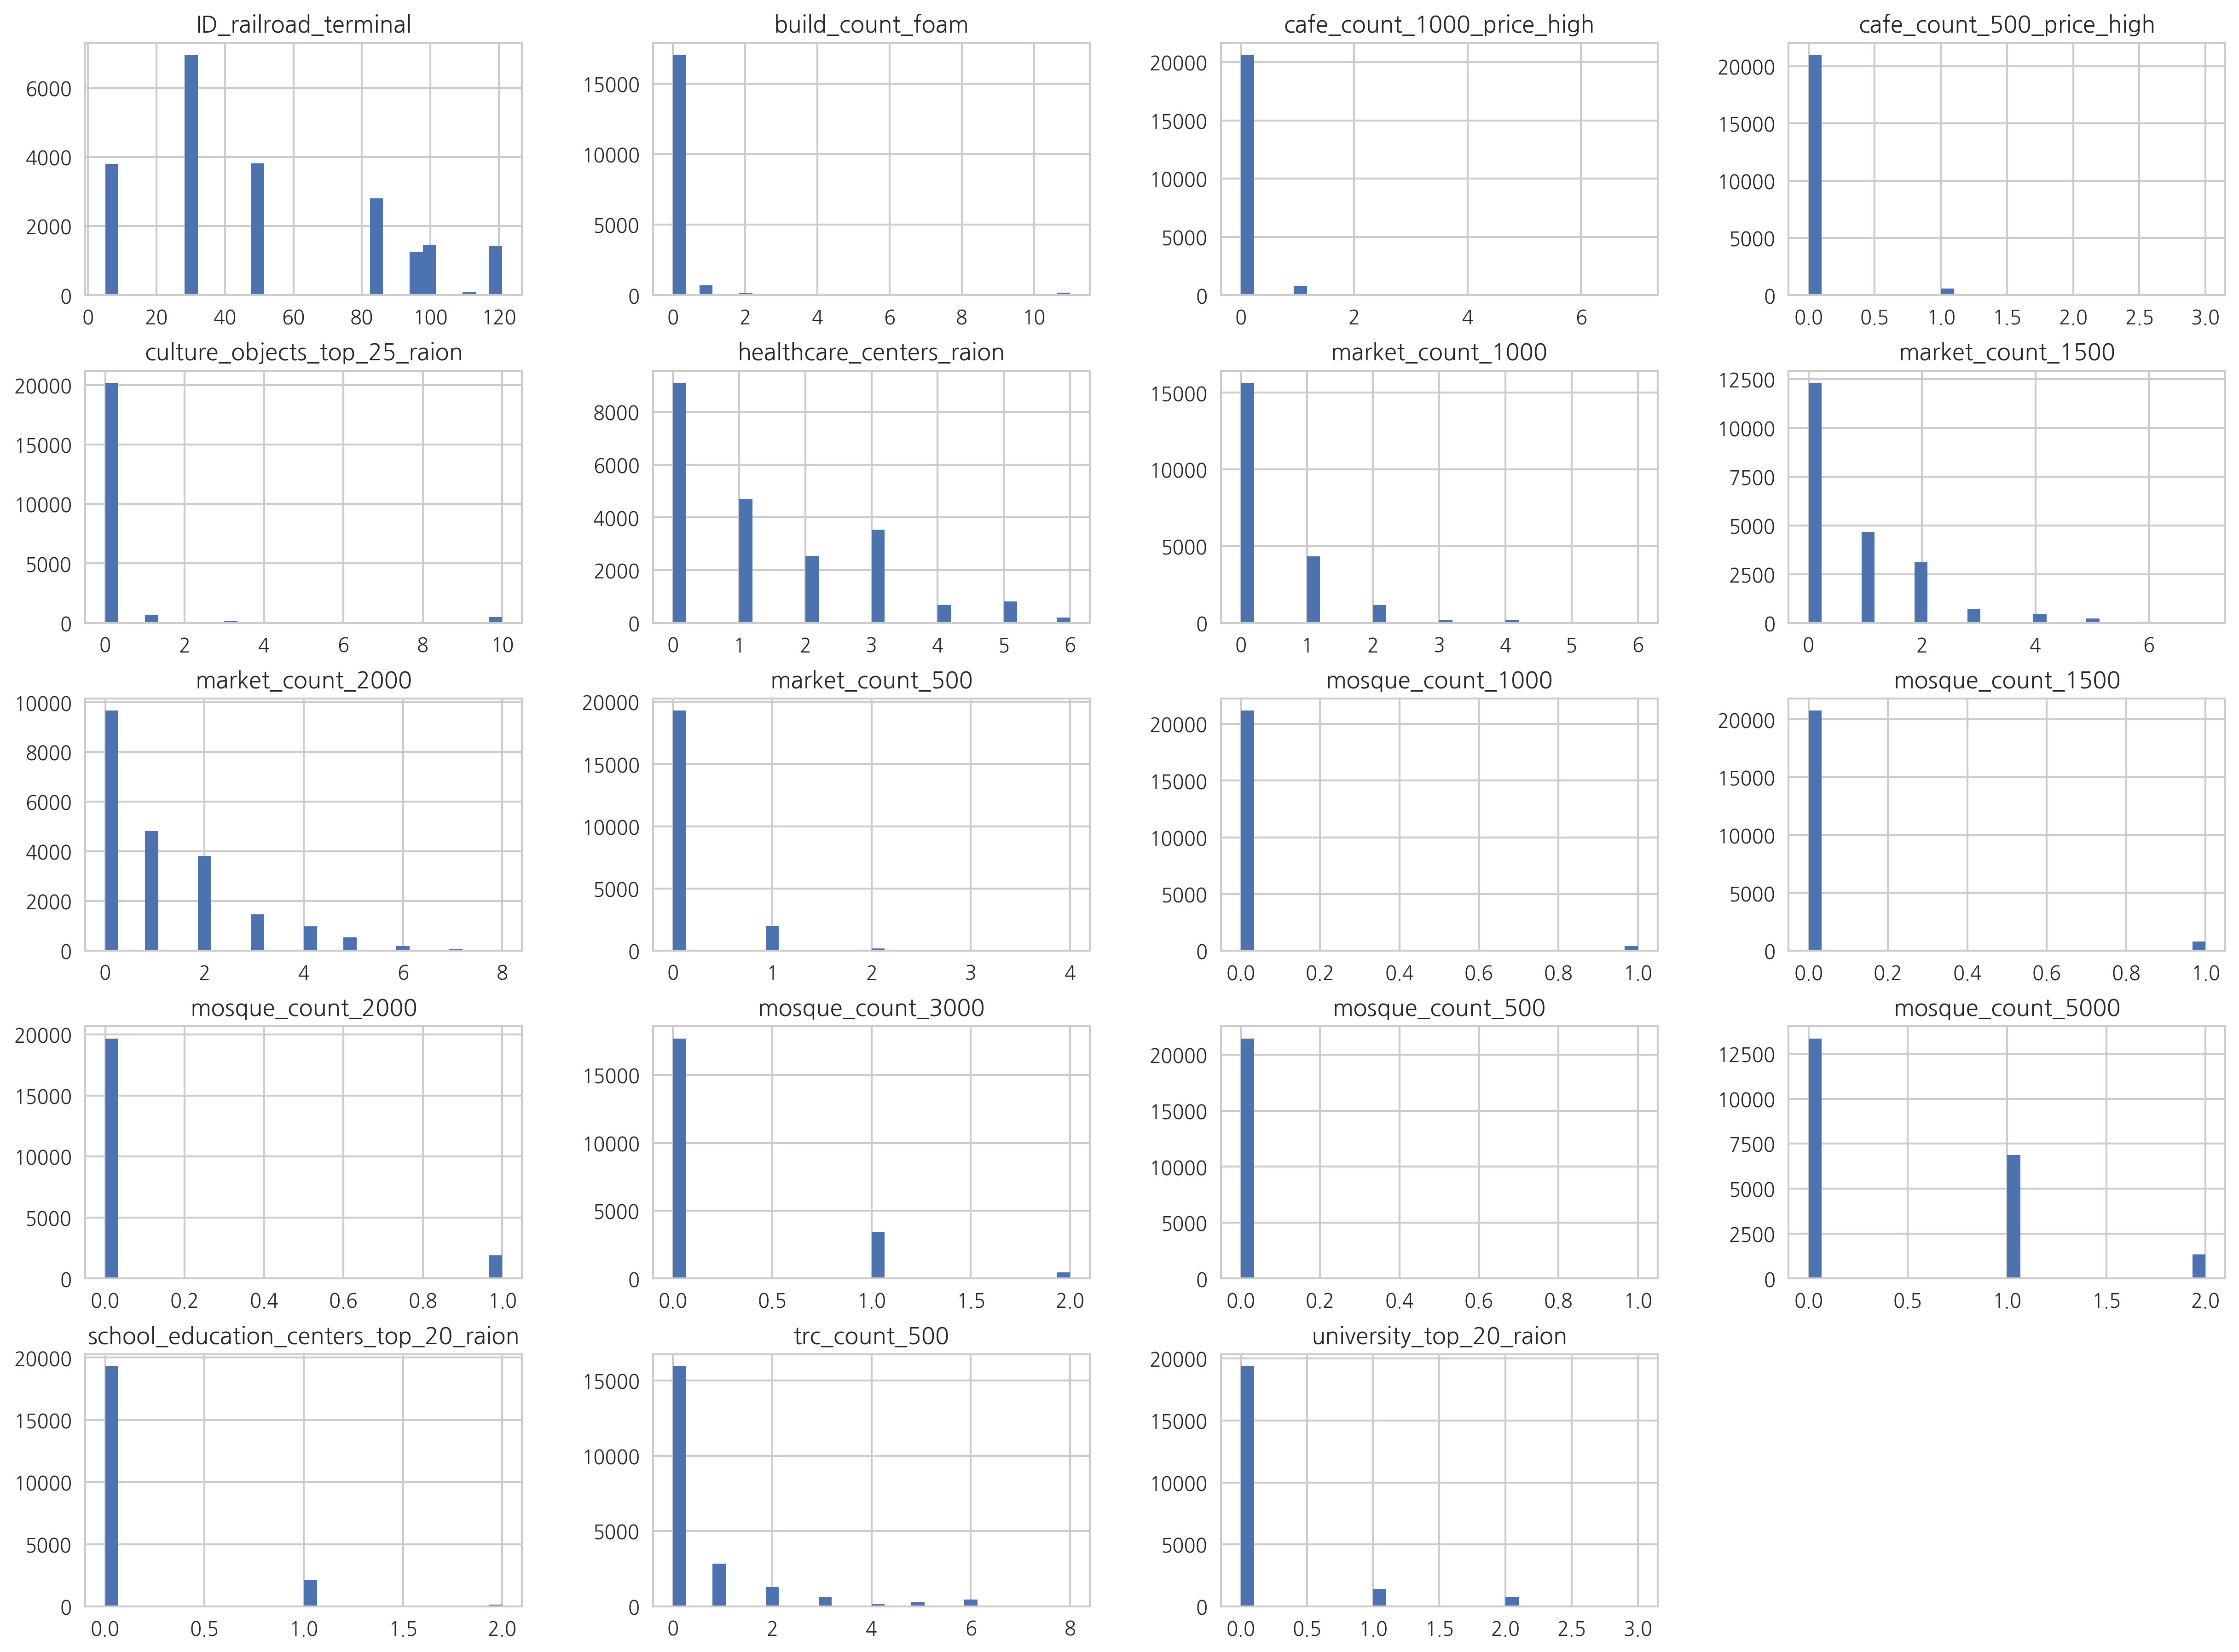

In [17]:
cat_var_candid = var_num[var_num.columns[var_name_unique_num['var_unique_num'].values < 10]]
cat_var_candid.hist(bins=30, figsize=(20,15))
plt.show()

In [19]:
#dates = pd.date_range('2011-08', '2015-06', freq='M')
timeseries = var_dep[['price_doc', 'timestamp']]
timeseries = timeseries.set_index(['timestamp'])
red_timeseries = timeseries.groupby(lambda month : month[:7]).mean()

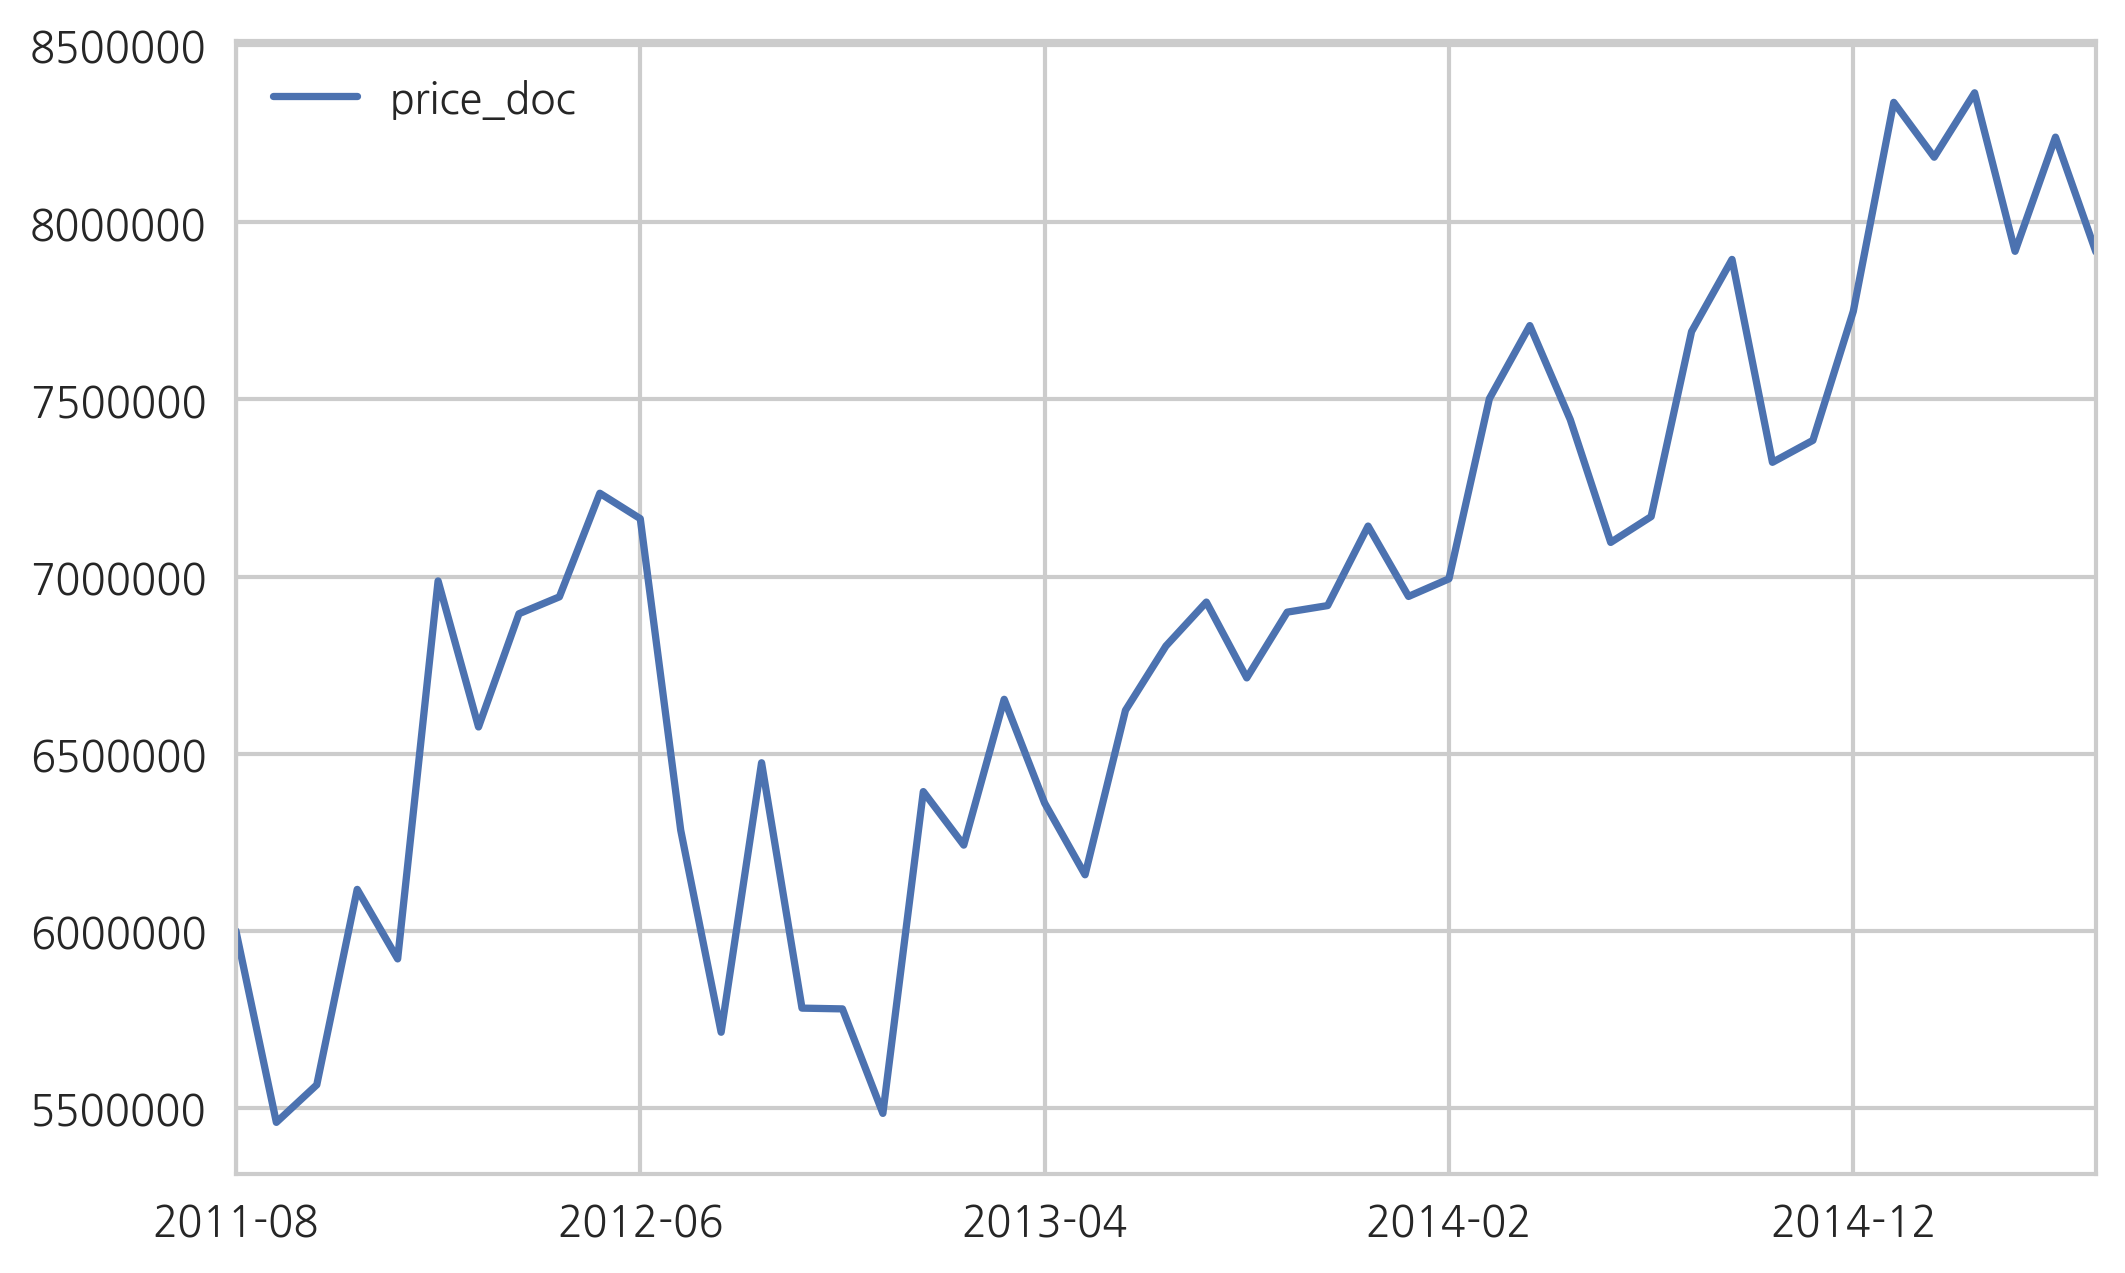

In [20]:
red_timeseries.plot()


In [21]:
var_dep.tail()

,price_doc,id,timestamp
21565,10262010,30467,2015-06-30
21566,7400000,30469,2015-06-30
21567,6970959,30471,2015-06-30
21568,13500000,30472,2015-06-30
21569,5600000,30473,2015-06-30


# 3. Categorical Variable Plot

## 3.1 Histogram

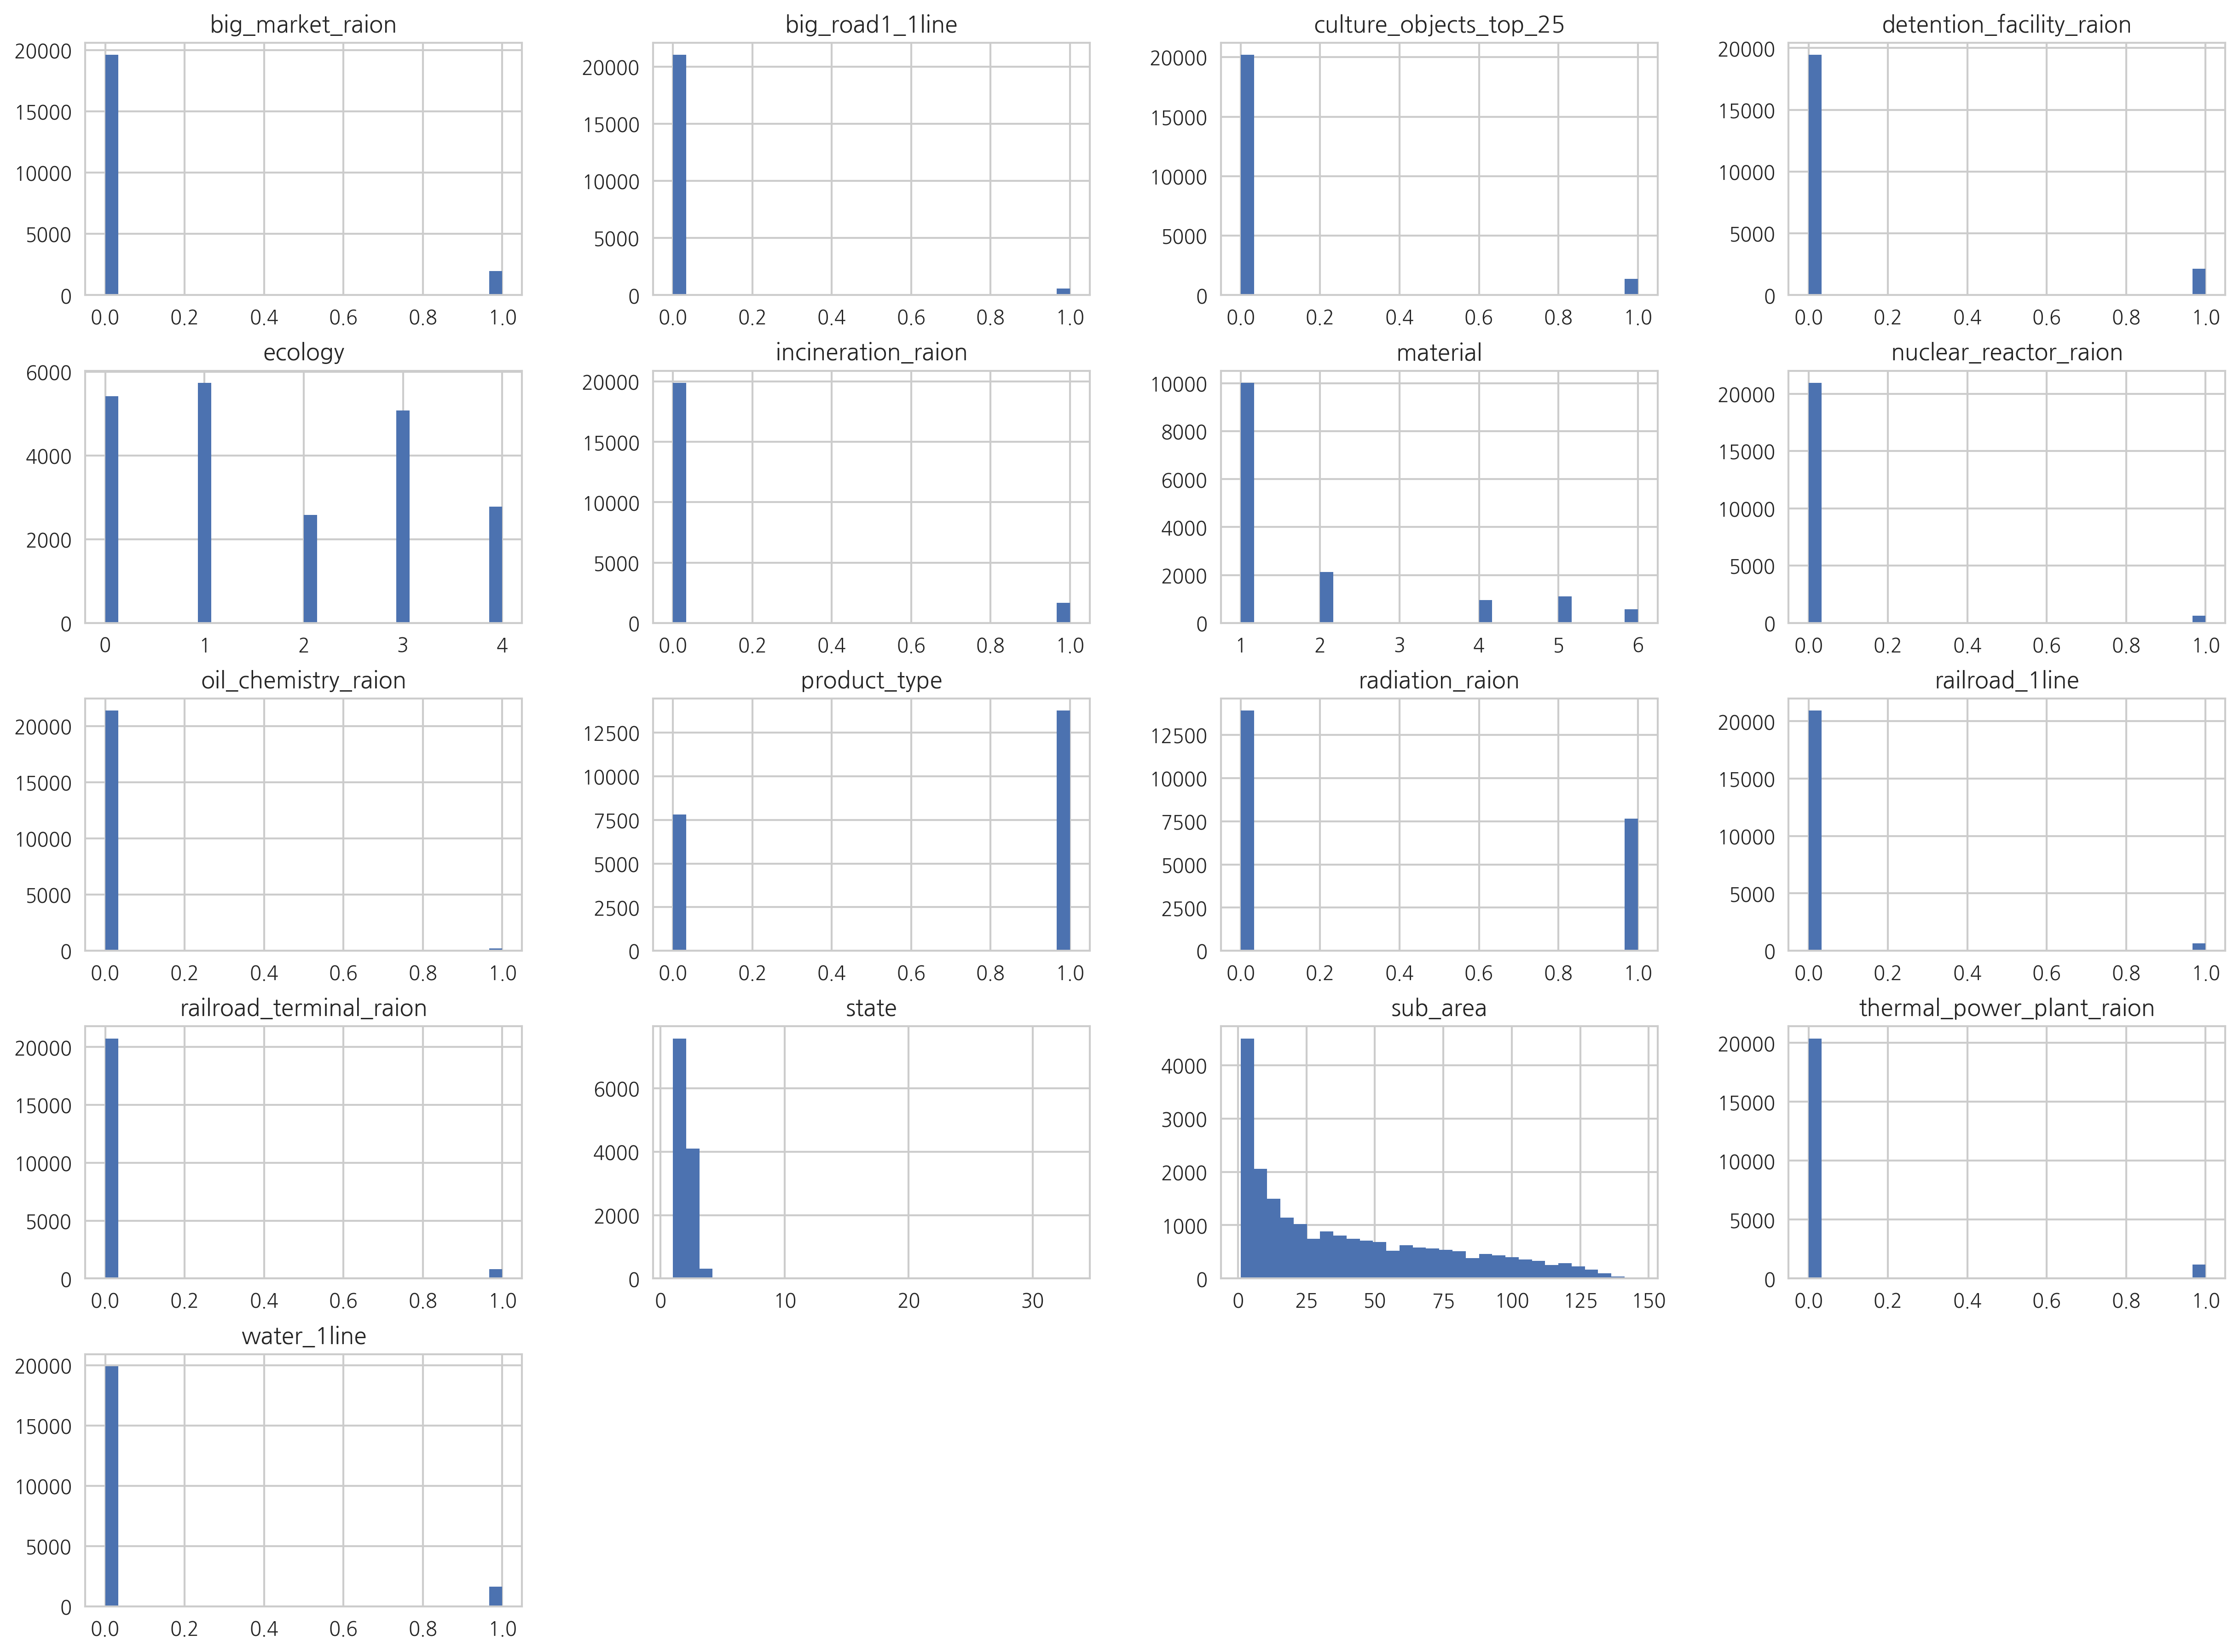

In [22]:
var_cat.hist(bins=30, figsize=(20,15))
plt.show()

## 3.2 Barplot with House Price

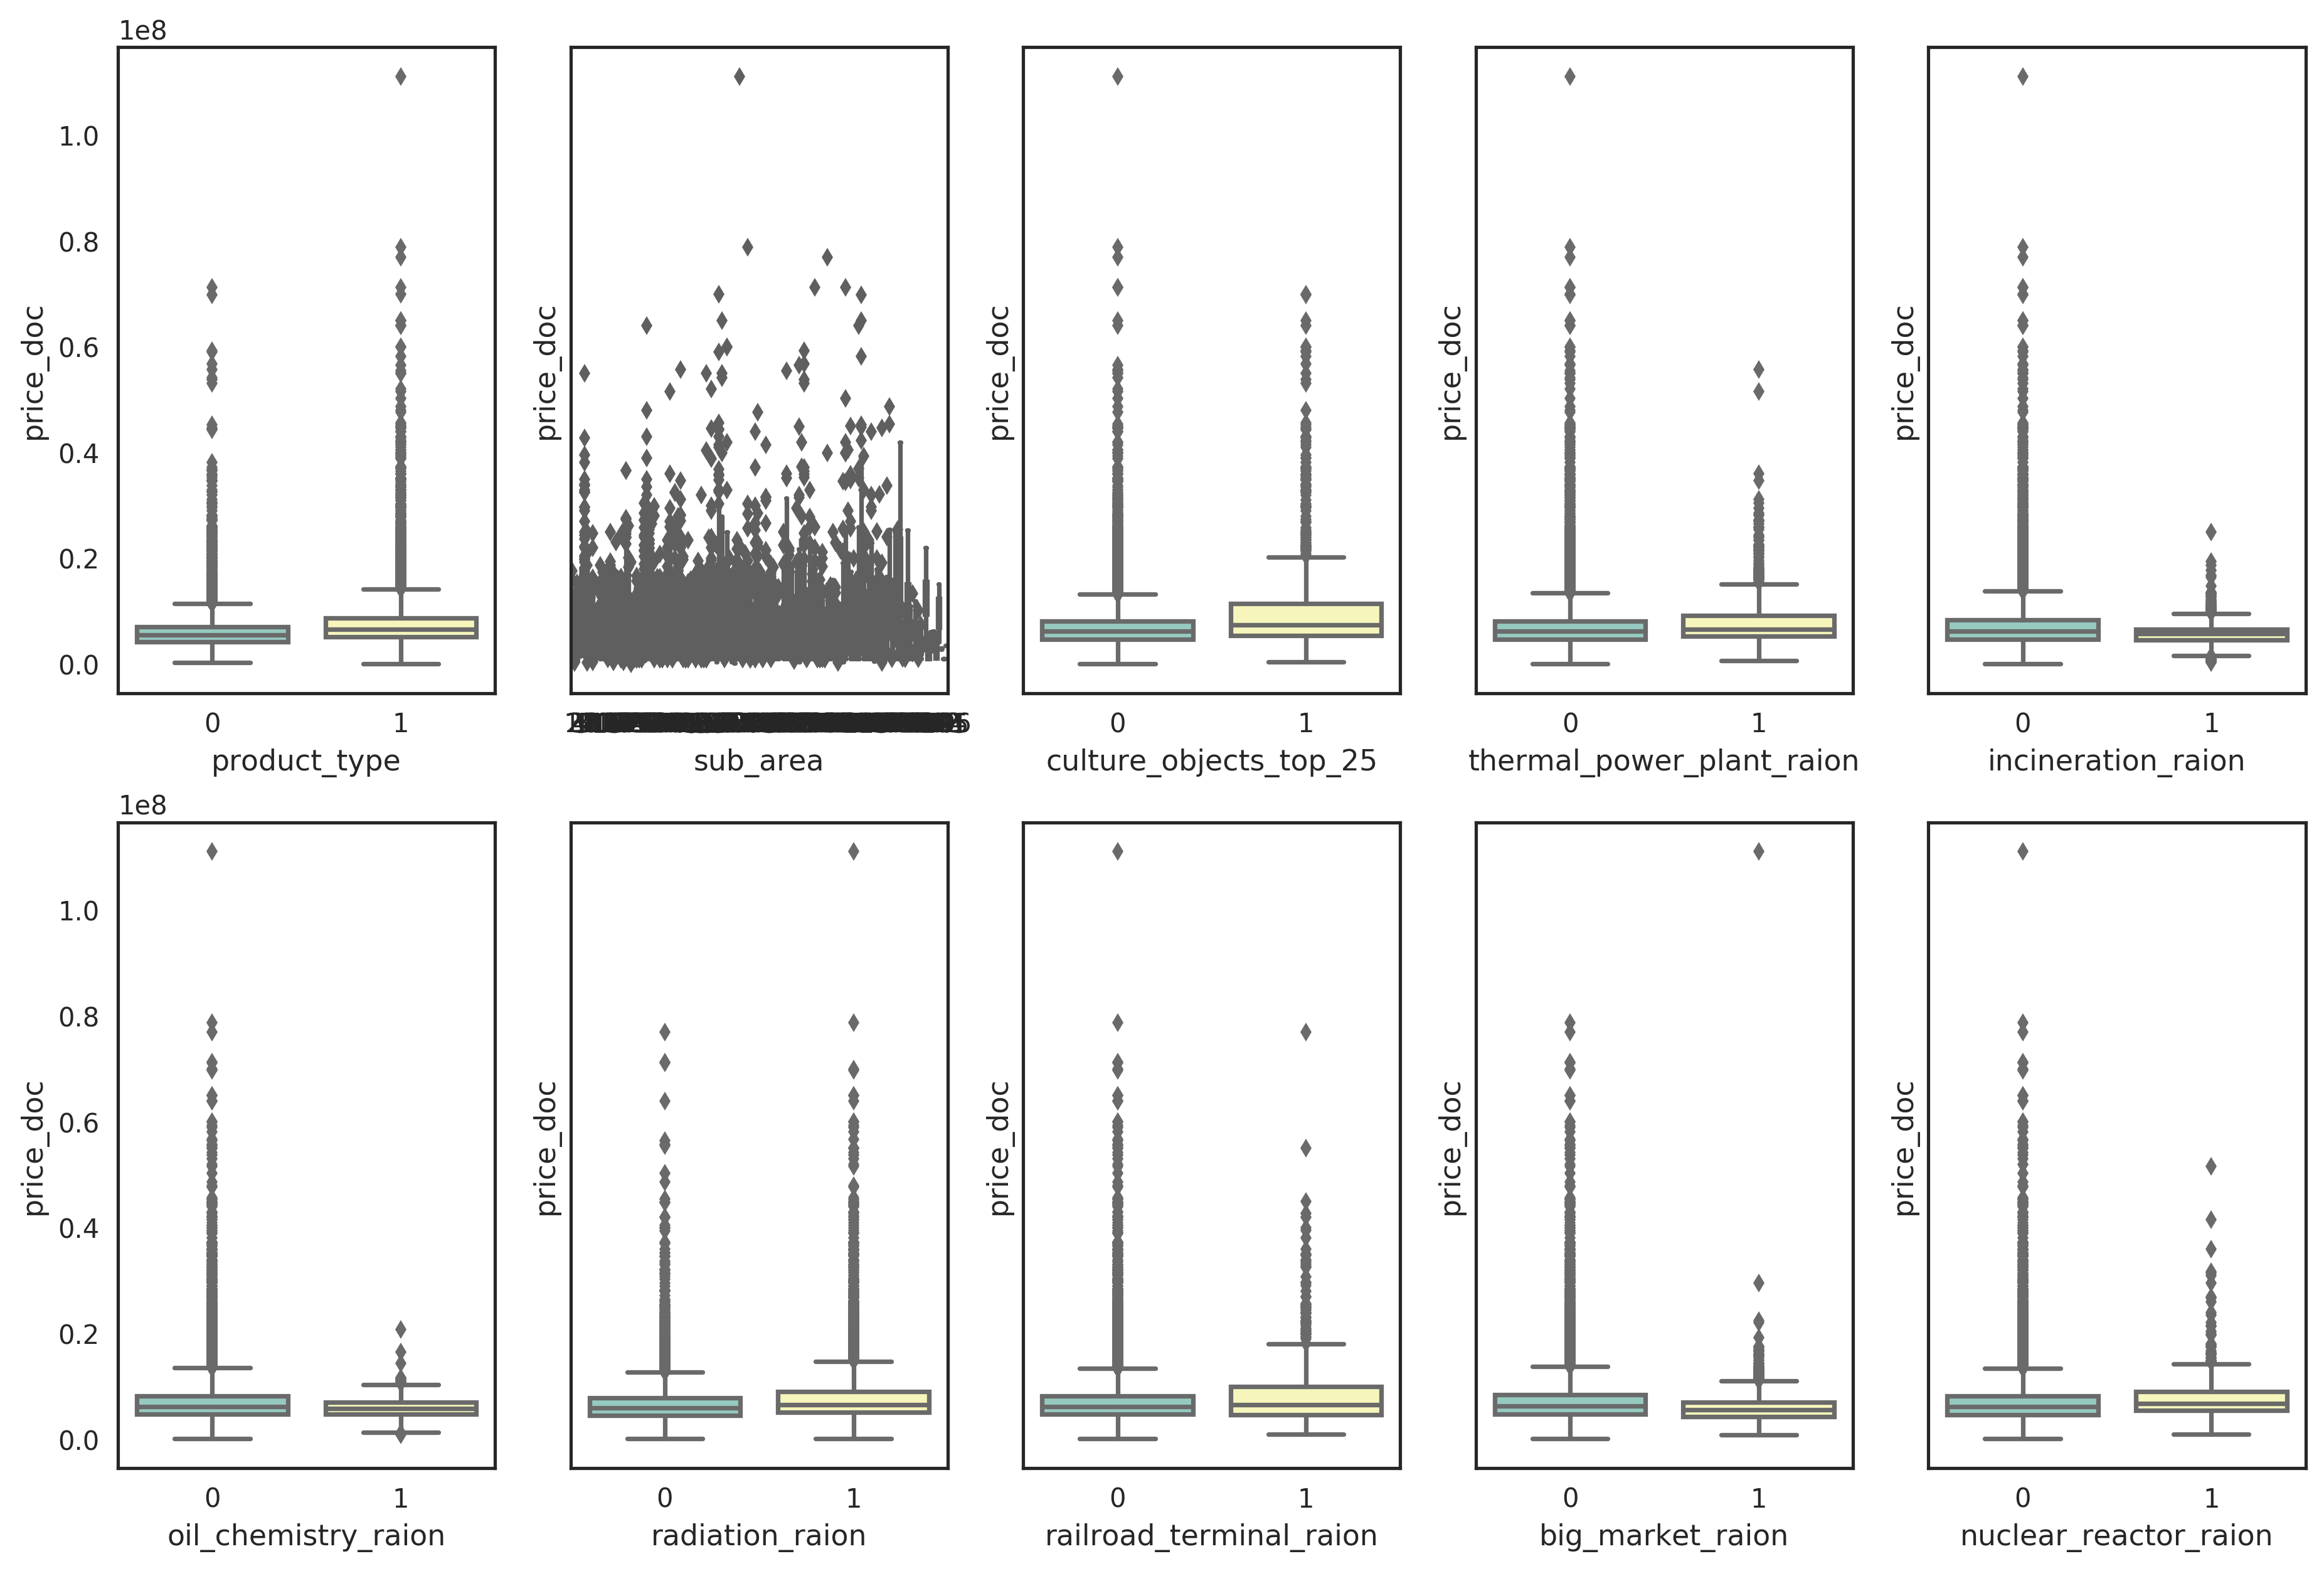

In [23]:
var_cat_list = var_cat.columns
with plt.style.context(('seaborn-white')):
    f, axes = plt.subplots(2, 5, figsize=(15, 10), sharey=True)    
     
for num, ax in zip(range(10), axes.flat):
    try:
        sns.boxplot(x=var_cat[var_cat_list[num]], y=var_dep['price_doc'], palette="Set3", ax=ax)
    except:
        pass

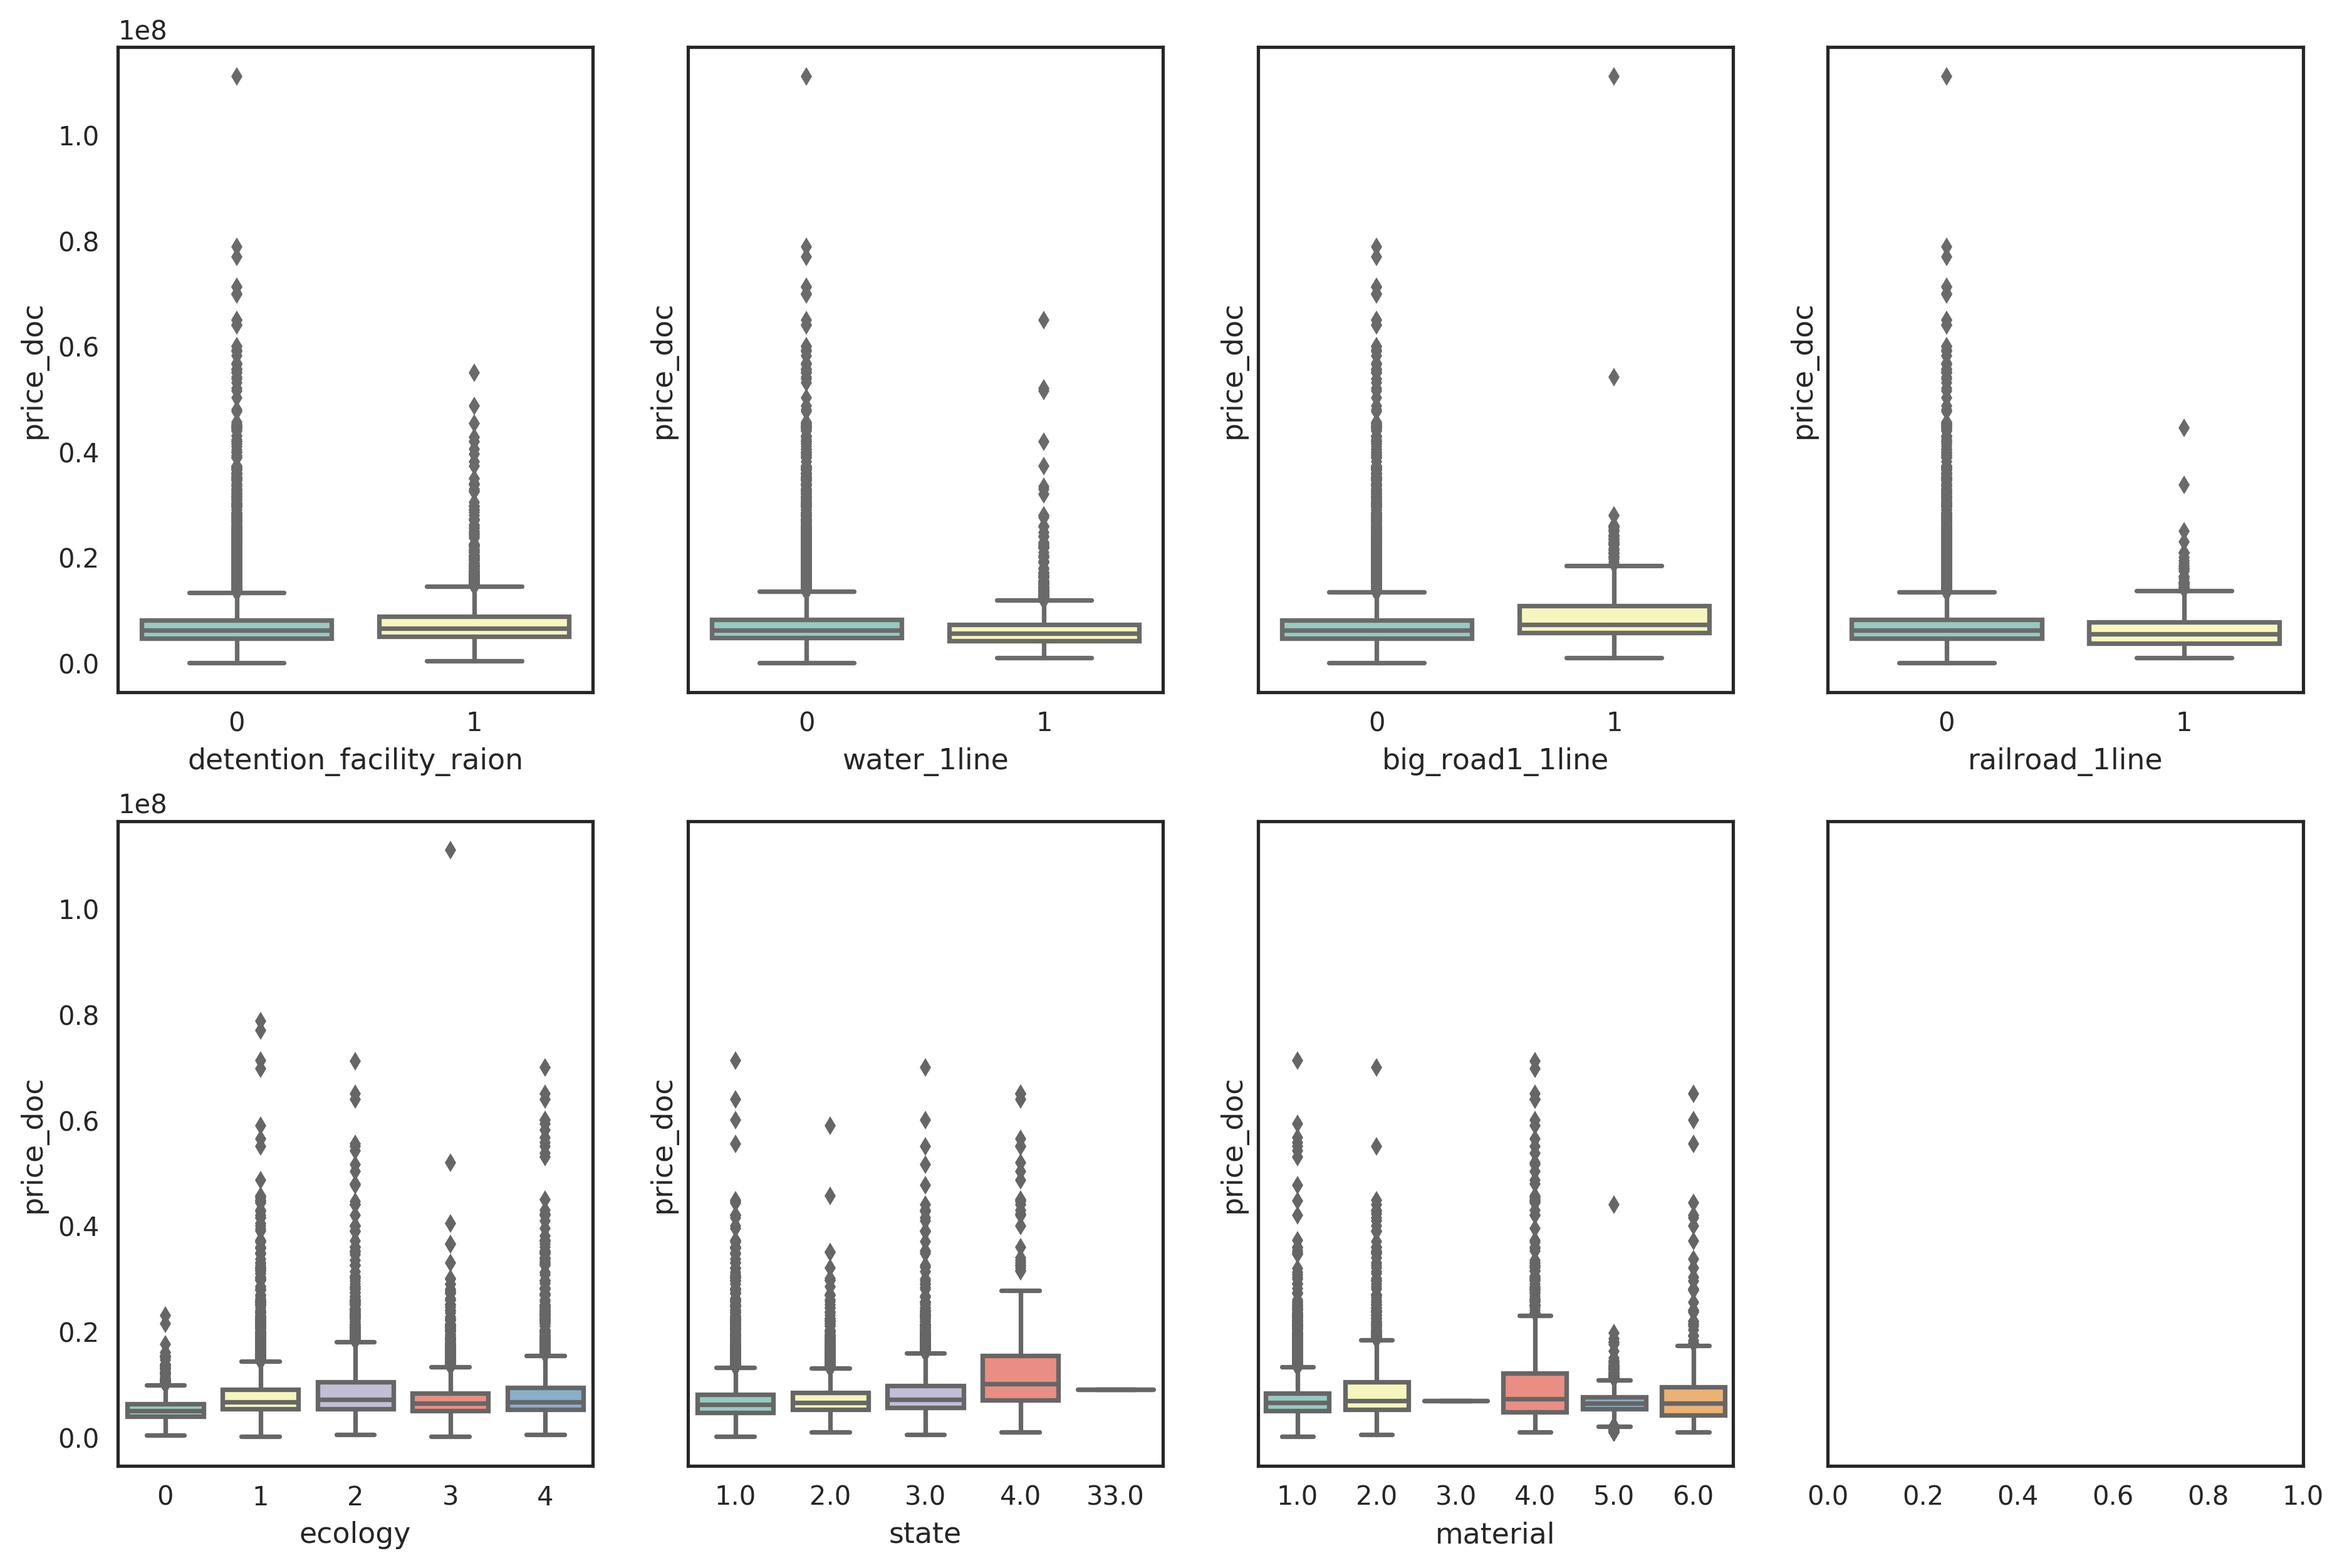

In [25]:
with plt.style.context(('seaborn-white')):
    f, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True)    
     
for num, ax in zip(range(10, 17), axes.flat):
    try:
        sns.boxplot(x=var_cat[var_cat_list[num]], y=var_dep['price_doc'], palette="Set3", ax=ax)
    except:
        pass

# 4. Numeric Variable Plot

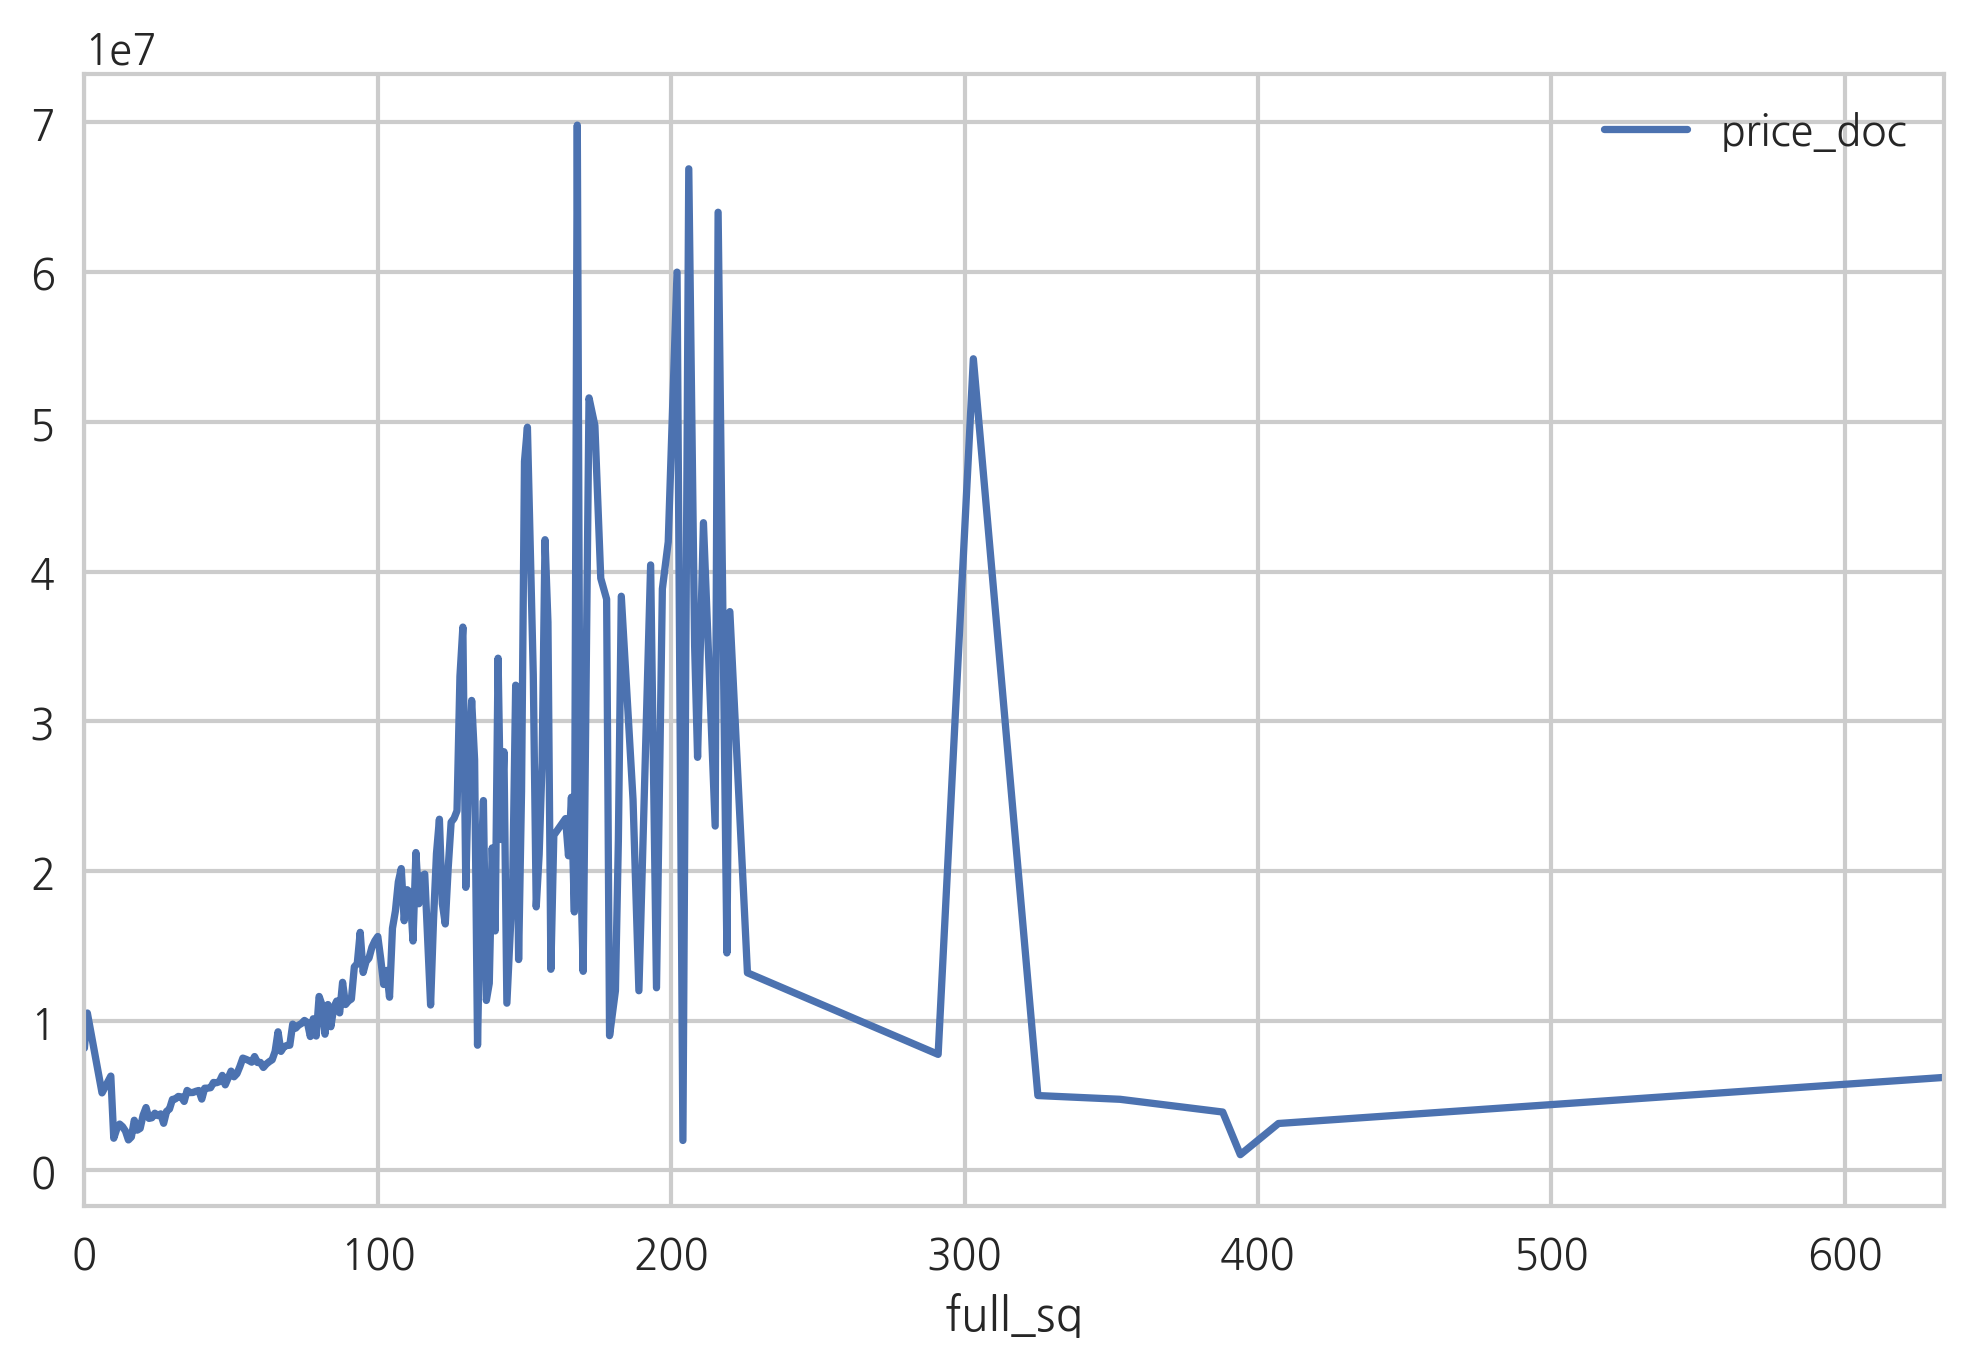

In [47]:
price_fullsq = pd.concat([var_num['full_sq'], var_dep['price_doc']], axis=1)
price_fullsq = price_fullsq.drop([2460])
price_fullsq.set_index('full_sq')
red_price_fullsq = price_fullsq.groupby('full_sq').mean()
red_price_fullsq.plot()

In [48]:
var_num.columns

Index(['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year',
       'num_room', 'kitch_sq', 'area_m', 'raion_popul',
       ...
       'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500',
       'cafe_count_5000_price_4000', 'cafe_count_5000_price_high',
       'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
       'leisure_count_5000', 'sport_count_5000', 'market_count_5000'],
      dtype='object', length=264)

In [ ]:
plt.

In [ ]:
price_fullsq = pd.concat([var_num['full_sq'], var_dep['price_doc']], axis=1)
price_fullsq = price_fullsq.drop([2460])
price_fullsq.set_index('full_sq')
red_price_fullsq = price_fullsq.groupby('full_sq').mean()
red_price_fullsq.plot()